In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
analysis_data = '../data/clean/removed_outliers_data.csv'

In [88]:
analysis_df1 = pd.read_csv(analysis_data)

In [4]:
analysis_df1

,client_id,visitor_id,visit_id,process_step,date_time,Variation,visit_final_step,step_duration,step_proceeds,step_error
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,False,7.0,True,False
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,False,32.0,True,False
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,False,99.0,True,False
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,False,20.0,True,False
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,True,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
275626,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,True,NaN,False,False
275627,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,Test,False,15.0,True,False
275628,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,Test,True,NaN,False,False
275629,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,False,8.0,True,False


In [90]:
# Mean duration of every step without errors - Control vs Test
successful_steps_df = analysis_df1[analysis_df1['step_proceeds'] == True]
successful_steps_df.groupby(['process_step', 'Variation'])[['step_duration']].mean()

step_duration
process_step Variation               
start        Control        21.071492
             Test           11.722863
step_1       Control        25.019211
             Test           28.580803
step_2       Control        72.492741
             Test           70.714146
step_3       Control        86.529187
             Test           73.399274

In [134]:
# Completion rate for each step withour error - Control vs Test
step_proceeds = analysis_df1.groupby(['process_step', 'Variation'])[['step_proceeds']].mean() * 100
step_proceeds

step_proceeds
process_step Variation               
confirm      Control         0.000000
             Test            0.000000
start        Control        64.051546
             Test           66.119509
step_1       Control        77.283975
             Test           76.322131
step_2       Control        82.745712
             Test           80.189321
step_3       Control        70.414239
             Test           74.996908

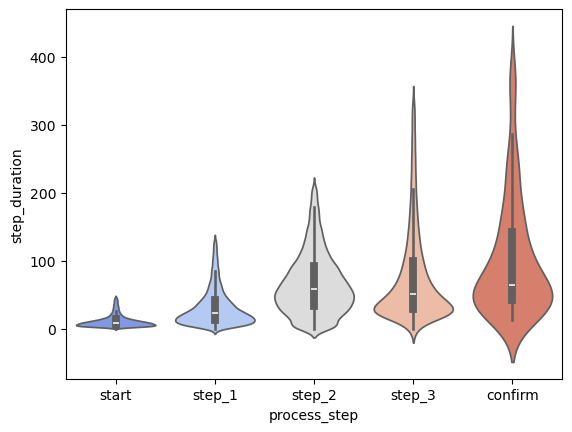

In [118]:
#Produce box/violin plot of process duration - control vs test
sns.violinplot(data= analysis_df1[analysis_df1['Variation'] == 'Test'], x= 'process_step', y= 'step_duration', palette = 'coolwarm', hue='process_step', inner="box");


<Axes: xlabel='process_step', ylabel='step_duration'>

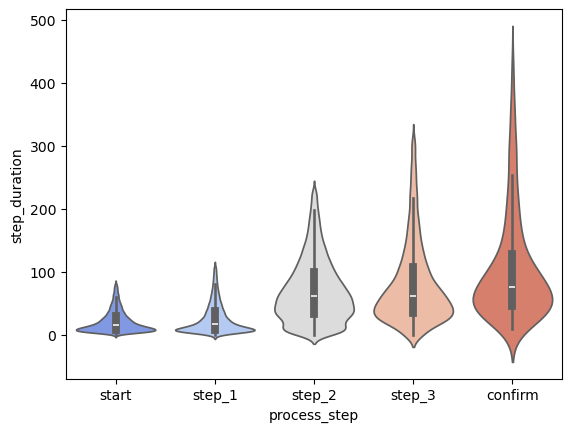

In [120]:
sns.violinplot(data = analysis_df1[analysis_df1['Variation'] == 'Control'], x = 'process_step', y = 'step_duration', palette = 'coolwarm', hue = 'process_step', inner = 'box')

               

In [82]:
analysis_df1.max()

client_id                                9999832
visitor_id                 999998529_89539814462
visit_id            999988789_76411676596_272843
process_step                              step_3
date_time                    2017-06-20 23:57:06
Variation                                   Test
visit_final_step                            True
step_duration                            22728.0
step_proceeds                               True
step_error                                  True
dtype: object

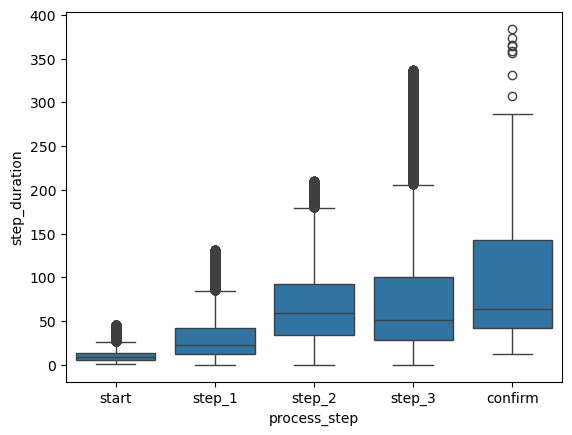

In [124]:
sns.boxplot(data=analysis_df1[analysis_df1['Variation'] == 'Test'], y='step_duration', x = 'process_step')
plt.show()

<Axes: xlabel='process_step', ylabel='step_duration'>

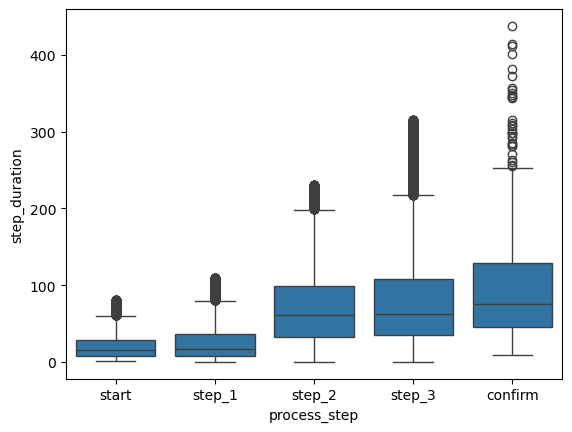

In [126]:
sns.boxplot(data = analysis_df1[analysis_df1['Variation'] == 'Control'], y = 'step_duration', x = 'process_step')

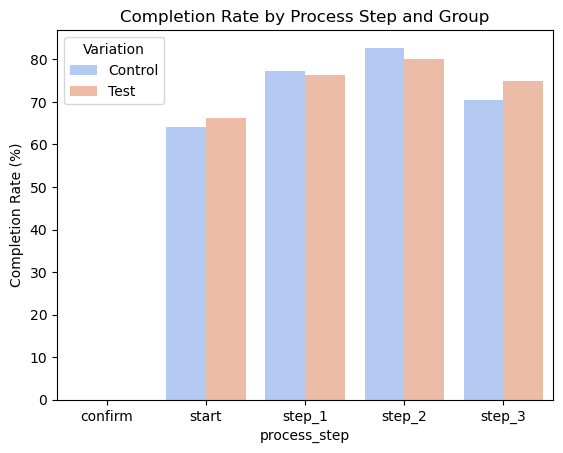

In [136]:
sns.barplot(data=step_proceeds, x='process_step', y='step_proceeds', hue='Variation', palette='coolwarm')
plt.ylabel('Completion Rate (%)')
plt.title('Completion Rate by Process Step and Group')
plt.show()
